## 網路上的知識圖譜

In [1]:
from os import listdir,path,rename,walk,makedirs

In [2]:
target_path = 'D:/Record/知識圖譜/語料庫/PubMed資料集/'

In [3]:
text = ""

for root, dirs, files in walk(target_path):
    for each_paper in files :

        with open(target_path+each_paper,'r',encoding='utf-8') as file :
            text_one = file.read()
            text += text_one+'\n'

In [4]:
text = text.split('\n')[0]

In [10]:
import spacy
from spacy.lang.en import English
import networkx as nx
import matplotlib.pyplot as plt

def getSentences(text):
    nlp = English()
    nlp.add_pipe(nlp.create_pipe('sentencizer'))
    document = nlp(text)
    return [sent.string.strip() for sent in document.sents]

# def printToken(token):
#     print(token.text, "->", token.dep_)

def appendChunk(original, chunk):
    return original + ' ' + chunk

def isRelationCandidate(token):
    deps = ["ROOT", "adj", "attr", "agent", "amod"]
    return any(subs in token.dep_ for subs in deps)

def isConstructionCandidate(token):
    deps = ["compound", "prep", "conj", "mod"]
    return any(subs in token.dep_ for subs in deps)

def processSubjectObjectPairs(tokens):
    subject = ''
    object = ''
    relation = ''
    subjectConstruction = ''
    objectConstruction = ''
    for token in tokens:
#         printToken(token)
        if "punct" in token.dep_:
            continue
        if isRelationCandidate(token):
            relation = appendChunk(relation, token.lemma_)
        if isConstructionCandidate(token):
            if subjectConstruction:
                subjectConstruction = appendChunk(subjectConstruction, token.text)
            if objectConstruction:
                objectConstruction = appendChunk(objectConstruction, token.text)
        if "subj" in token.dep_:
            subject = appendChunk(subject, token.text)
            subject = appendChunk(subjectConstruction, subject)
            subjectConstruction = ''
        if "obj" in token.dep_:
            object = appendChunk(object, token.text)
            object = appendChunk(objectConstruction, object)
            objectConstruction = ''

    print (subject.strip(), ",", relation.strip(), ",", object.strip())
    return (subject.strip(), relation.strip(), object.strip())

def processSentence(sentence):
    tokens = nlp_model(sentence)
    return processSubjectObjectPairs(tokens)

def printGraph(triples):
    G = nx.Graph()
    for triple in triples:
        G.add_node(triple[0])
        G.add_node(triple[1])
        G.add_node(triple[2])
        G.add_edge(triple[0], triple[1])
        G.add_edge(triple[1], triple[2])

    pos = nx.spring_layout(G)
    plt.figure()
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, node_color='seagreen', alpha=0.9,
            labels={node: node for node in G.nodes()})
    plt.axis('off')
    plt.savefig('D:/Record/知識圖譜/圖片/test.png')
    plt.show()

In [11]:


text = "London is the capital and largest city of England and the United Kingdom. Standing on the River " \
       "Thames in the south-east of England, at the head of its 50-mile (80 km) estuary leading to " \
       "the North Sea, London has been a major settlement for two millennia. " \
       "Londinium was founded by the Romans. The City of London, " \
       "London's ancient core − an area of just 1.12 square miles (2.9 km2) and colloquially known as " \
       "the Square Mile − retains boundaries that follow closely its medieval limits." \
       "The City of Westminster is also an Inner London borough holding city status. " \
       "Greater London is governed by the Mayor of London and the London Assembly." \
       "London is located in the southeast of England." \
       "Westminster is located in London." \
       "Jeff is good boy." \
       "London is the biggest city in Britain. London has a population of 7,172,036."

sentences = getSentences(text)
nlp_model = spacy.load('en_core_web_sm')

triples = []
# print (text)
for sentence in sentences:
    triples.append(processSentence(sentence))

    

London , be capital large , England
London , 50-mile be major settlement , Thames east England head estuary Sea millennia
Londinium , found by , Romans
City core that , ancient square retain medieval , London miles − boundaries limits
City , be hold status , Westminster
London , govern by , Mayor London
London , locate , southeast England
Westminster , locate , London
Jeff , be good boy , 
London , be big city , Britain
London , have , population 7,172,036


In [12]:
triples

[('London', 'be capital large', 'England'),
 ('London',
  '50-mile be major settlement',
  'Thames east England head estuary Sea millennia'),
 ('Londinium', 'found by', 'Romans'),
 ('City core that',
  'ancient square retain medieval',
  'London miles − boundaries limits'),
 ('City', 'be hold status', 'Westminster'),
 ('London', 'govern by', 'Mayor London'),
 ('London', 'locate', 'southeast England'),
 ('Westminster', 'locate', 'London'),
 ('Jeff', 'be good boy', ''),
 ('London', 'be big city', 'Britain'),
 ('London', 'have', 'population 7,172,036')]

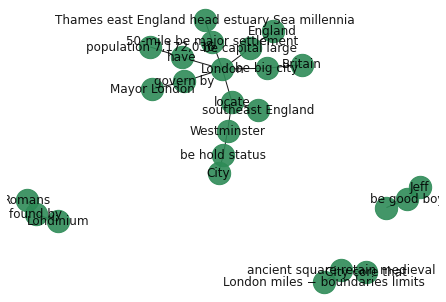

In [13]:
printGraph(triples)

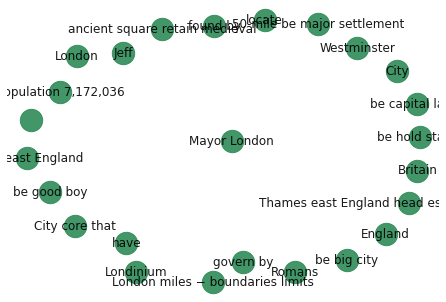

In [14]:
G = nx.Graph()
for triple in triples:
    G.add_node(triple[0])
    G.add_node(triple[1])
    G.add_node(triple[2])
#     G.add_edge(triple[0], triple[1])
#     G.add_edge(triple[1], triple[2])

pos = nx.spring_layout(G)
plt.figure()
nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
        node_size=500, node_color='seagreen', alpha=0.9,
        labels={node: node for node in G.nodes()})
plt.axis('off')
# plt.savefig('C:/Users/Tingchun.TC.Hung/Desktop/Record/知識圖譜/圖片/test.png')
plt.show()

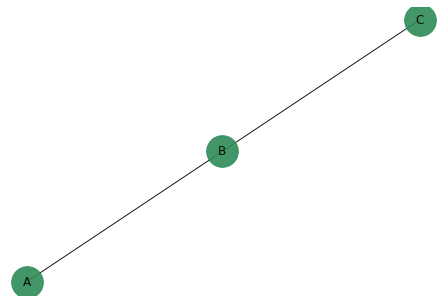

In [17]:
G = nx.Graph()
G.add_edge('A', 'B', length = 10)
G.add_edge('B', 'C', length = 242.7, color='red')
pos = nx.spring_layout(G)
nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
        node_size=1000, node_color='seagreen', alpha=0.9,
        labels={node: node for node in G.nodes()})
# nx.draw(G, pos=nx.drawing.nx_agraph.graphviz_layout(G, prog='dot'))
plt.show()

In [18]:
pos

{'A': array([-0.20957871, -0.99691607]),
 'B': array([-0.00064865, -0.00308393]),
 'C': array([0.21022736, 1.        ])}

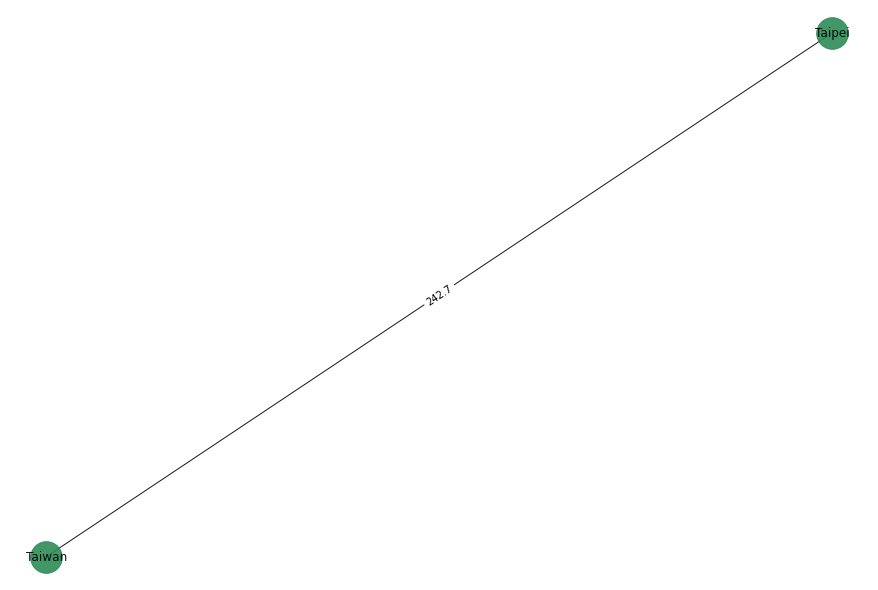

In [20]:
G = nx.Graph()

G.add_node('Taiwan')
G.add_node('Taipei')
G.add_edge('Taiwan','Taipei', label = '?', length = 242.7, color='red')

# G.add_node('Taipei')
# G.add_node('Taiwan')
# G.add_edge('Taipei','Taiwan')

# G.add_node('En')
# G.add_node('London')

# G.add_edges_from([(3, 4), (1, 4),(1,5),(1,3)], label='?')
# G.add_edge('En', 'London', weight=7, capacity=15, length=242.7)
#     G.add_edge(triple[1], triple[2])

pos = nx.spring_layout(G, seed=2)
length = nx.get_edge_attributes(G, 'length')
plt.figure(figsize=(12,8))
nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
        node_size=1000, node_color='seagreen', alpha=0.9,
        labels={node: node for node in G.nodes()})

nx.draw_networkx_edge_labels(G,pos,edge_labels=length)
plt.axis('off')
# plt.savefig('C:/Users/Tingchun.TC.Hung/Desktop/Record/知識圖譜/圖片/test.png')
plt.show()

In [21]:
import pandas as pd

In [22]:
save_Dic_path = 'D:/Record/知識圖譜/產生字典/'

Connect_NE = pd.read_csv(save_Dic_path+'Connect_NE.csv')
Connect_NE.index = Connect_NE["Unnamed: 0"]
Connect_NE = Connect_NE.drop(columns=['Unnamed: 0'])

In [23]:
Connect_NE

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
uveitis,"patient,0.17910076942000144","HSV,0.11582534967286569","virus,0.10116651956141133","case,0.09374906103566275","PCR,0.09374901937074008","anterior,0.0862686881171008","diagnosis,0.07114575680801602","disease,0.0634917027681539","fuchs,0.06348503904865092","sample,0.05577658993069164",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B19V,"DNA,0.12306894541603314","infection,0.05577521007747738","blood,0.04015965094630754","acute,0.02429114137044932","virion,0.024291110624613293","donor,0.0242908138776708","endonuclease,0.024285681733178265","study,0.016260025577840415","detection,0.016260019079336364","detect,0.016260018076473162",...,"degradation,0.008162933654689493","peak,0.008162857553387168","propose,0.008162839740410169","imply,0.008162722472255973",NaN,NaN,NaN,NaN,NaN,NaN
human,"virus,0.7676535478248764","cell,0.6214534327509373","assay,0.5167046008864187","sample,0.49845022315127996","RNA,0.4408850207415366","detect,0.4257978053752874","method,0.4052205064781423","particle,0.40521900869832705",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WSSV,"IHHNV,0.07114097909513924","shrimp,0.07114066462850373","PCR,0.055775808114013004","monodon,0.0557651633271639","group,0.0401598336653906","cyst,0.04015547961019934","artemia,0.04015436111653705","template,0.03225678946999868","infection,0.024291306327373773","result,0.02429129655448253",...,"time,0.008163240164418974","mutation,0.008163238815836213","perform,0.008163238764118487","material,0.008163238740248713","diagnostic,0.00816323547374705","syndrome,0.008163231796678284","impact,0.008163230622552272","effect,0.008163226203916608","adult,0.008163225797821324","set,0.008163219079895291"
detect,"virus,0.9875200690888224","sample,0.7920502623249818","cell,0.6986440583959398","RNA,0.6330342896647789",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAT,"FMDV,0.08536774359900681","test,0.07052864192665018","region,0.047714000183651205","assay,0.039962576756479753","TaqMan,0.03995724845579795","FMD,0.039956257261585845","detection,0.032131023536750104","target,0.032129826139562084","diagnosis,0.024219833766475726","rapid,0.024219478045112083",...,"laboratory,0.008155068382876017","collect,0.008155059740097932","health,0.008155058354210314","molecular,0.008155045907888278","strain,0.008155044046462494","difference,0.008155036337033659","virus,0.008155025885758501","sensitivity,0.008155016605051246","stock,0.008154954508249147","implement,0.008154906272333048"
perspective,"food,0.08607873798196854","result,0.04794047198604159","RT-qPCR,0.04794012086654386","method,0.040118730484482536","borne,0.04010805352852872","detection,0.03223117327116844","virus,0.032230841469588496","microorganism,0.03222546174096969","increase,0.02427620935099881","contamination,0.024276088864296875",...,"multiple,0.008161535830441168","cell,0.008161534551956538","RNA,0.008161531959554765","time,0.008161531247675909","future,0.00816152890750079","potential,0.008161527125243182","case,0.00816152582634495","control,0.008161523252441053","identify,0.008161521744411288","HAV,0.008161521251965419"
status,"SERVagm-Vero,0.06314547201780436","vaccine,0.06314114512300151","infection,0.06313875506133278","human,0.05550378628845907","case,0.05550328678387223","nmoll,0.055499947381792564","vitamin,0.047796522700110325","SERV,0.047789225037509764","cell,0.04001915666558611","level,0.04001808019710831",...,"include,0.01623681148059095","condition,0.016236771074578972","review,0.016236770617279607","RT-PCR,0.016236764672144917","potential,0.01623670591518533","associate,0.01623659372550365","ELISA,0.016236533835504142","transcription-pcr,0.016236511334919865","brain,0.016236074487800334","bear,0.016235905102433366"


In [24]:
Connect_NE.index.values

array(['uveitis', 'B19V', 'human', ..., 'status', 'marburg',
       'retrospective'], dtype=object)

In [25]:
def printDiGraph(Connect_NE,num = -1,word='',mode='one',times=1,threshold=2):
#     print(times,threshold)
    if times <= threshold:

        Index = Connect_NE.index.values
        if mode == 'one' :

            if num == -1 and word=='':
                now_Index = Index[0]
            elif num!=-1 and num>=0 :
                if(word!=''):
                    print('Mainly use number, delete number if you want to use text')
                now_Index = Index[num]

            elif word!='':
                try:
                    now_Index_num = list(Index).index(word)
                    now_Index = Index[now_Index_num]
                except:
                    print('This keyword does not exist in KG')
                    return 0
                
            elif num!=-1 and num>=0 and word!='':
                
                now_Index = Index[num]
            

            now_Index_NE = Connect_NE.loc[now_Index].values

            for each_NE in now_Index_NE :
                None_appear = False
                try:
                    NE = each_NE.split(',')[0]
                    NE_score = each_NE.split(',')[1][:6]
                    G.add_node(now_Index)
                    G.add_node(NE)
                    G.add_edge(now_Index,NE, label = NE_score , length = 1, color='red')

                    if times <= threshold:
                        printDiGraph(Connect_NE,word=NE,times=times+1,threshold=threshold)

                except:
                    None_appear = True
                    break
        elif mode == 'all' :
            for now_Index in Index[:5] :
                now_Index_NE = Connect_NE.loc[now_Index].values

                for each_NE in now_Index_NE :
                    None_appear = False
                    try:
                        NE = each_NE.split(',')[0]
                        NE_score = each_NE.split(',')[1][:6]
                        G.add_node(now_Index)
                        G.add_node(NE)
                        G.add_edge(now_Index,NE, label = NE_score , length = 1, color='red')
                    except:
                        None_appear = True
                        break            
        pos = nx.spring_layout(G, seed=1)
        label = nx.get_edge_attributes(G, 'label')

        if times == 1:
            plt.figure(figsize=(12,8))
            nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
                    node_size=1000, node_color='seagreen', alpha=0.6,
                    labels={node: node for node in G.nodes()})

            nx.draw_networkx_edge_labels(G,pos,label_pos = 0.3,edge_labels=label)

            plt.axis('off')
            # plt.savefig('C:/Users/Tingchun.TC.Hung/Desktop/Record/知識圖譜/圖片/test.png')
            plt.show()

In [26]:
Connect_NE.index.values[0]

'uveitis'

In [27]:
Connect_NE

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
uveitis,"patient,0.17910076942000144","HSV,0.11582534967286569","virus,0.10116651956141133","case,0.09374906103566275","PCR,0.09374901937074008","anterior,0.0862686881171008","diagnosis,0.07114575680801602","disease,0.0634917027681539","fuchs,0.06348503904865092","sample,0.05577658993069164",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B19V,"DNA,0.12306894541603314","infection,0.05577521007747738","blood,0.04015965094630754","acute,0.02429114137044932","virion,0.024291110624613293","donor,0.0242908138776708","endonuclease,0.024285681733178265","study,0.016260025577840415","detection,0.016260019079336364","detect,0.016260018076473162",...,"degradation,0.008162933654689493","peak,0.008162857553387168","propose,0.008162839740410169","imply,0.008162722472255973",NaN,NaN,NaN,NaN,NaN,NaN
human,"virus,0.7676535478248764","cell,0.6214534327509373","assay,0.5167046008864187","sample,0.49845022315127996","RNA,0.4408850207415366","detect,0.4257978053752874","method,0.4052205064781423","particle,0.40521900869832705",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WSSV,"IHHNV,0.07114097909513924","shrimp,0.07114066462850373","PCR,0.055775808114013004","monodon,0.0557651633271639","group,0.0401598336653906","cyst,0.04015547961019934","artemia,0.04015436111653705","template,0.03225678946999868","infection,0.024291306327373773","result,0.02429129655448253",...,"time,0.008163240164418974","mutation,0.008163238815836213","perform,0.008163238764118487","material,0.008163238740248713","diagnostic,0.00816323547374705","syndrome,0.008163231796678284","impact,0.008163230622552272","effect,0.008163226203916608","adult,0.008163225797821324","set,0.008163219079895291"
detect,"virus,0.9875200690888224","sample,0.7920502623249818","cell,0.6986440583959398","RNA,0.6330342896647789",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAT,"FMDV,0.08536774359900681","test,0.07052864192665018","region,0.047714000183651205","assay,0.039962576756479753","TaqMan,0.03995724845579795","FMD,0.039956257261585845","detection,0.032131023536750104","target,0.032129826139562084","diagnosis,0.024219833766475726","rapid,0.024219478045112083",...,"laboratory,0.008155068382876017","collect,0.008155059740097932","health,0.008155058354210314","molecular,0.008155045907888278","strain,0.008155044046462494","difference,0.008155036337033659","virus,0.008155025885758501","sensitivity,0.008155016605051246","stock,0.008154954508249147","implement,0.008154906272333048"
perspective,"food,0.08607873798196854","result,0.04794047198604159","RT-qPCR,0.04794012086654386","method,0.040118730484482536","borne,0.04010805352852872","detection,0.03223117327116844","virus,0.032230841469588496","microorganism,0.03222546174096969","increase,0.02427620935099881","contamination,0.024276088864296875",...,"multiple,0.008161535830441168","cell,0.008161534551956538","RNA,0.008161531959554765","time,0.008161531247675909","future,0.00816152890750079","potential,0.008161527125243182","case,0.00816152582634495","control,0.008161523252441053","identify,0.008161521744411288","HAV,0.008161521251965419"
status,"SERVagm-Vero,0.06314547201780436","vaccine,0.06314114512300151","infection,0.06313875506133278","human,0.05550378628845907","case,0.05550328678387223","nmoll,0.055499947381792564","vitamin,0.047796522700110325","SERV,0.047789225037509764","cell,0.04001915666558611","level,0.04001808019710831",...,"include,0.01623681148059095","condition,0.016236771074578972","review,0.016236770617279607","RT-PCR,0.016236764672144917","potential,0.01623670591518533","associate,0.01623659372550365","ELISA,0.016236533835504142","transcription-pcr,0.016236511334919865","brain,0.016236074487800334","bear,0.016235905102433366"


Mainly use number, delete number if you want to use text


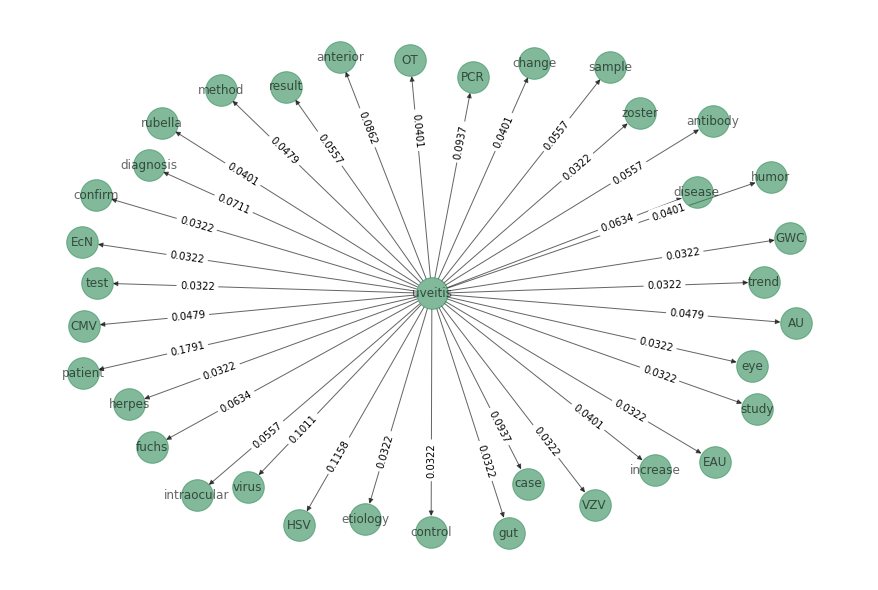

In [28]:
G = nx.DiGraph()
printDiGraph(Connect_NE,num = 0,word='detect',threshold=1)

In [29]:
import tkinter as tk
from tkinter import ttk,scrolledtext,Menu,Spinbox,BOTH, END, LEFT
from matplotlib.backend_bases import key_press_handler
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import (
    FigureCanvasTkAgg, NavigationToolbar2Tk)
import threading
import spacy
from spacy.lang.en import English
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
def printDiGraph(Connect_NE,num = -1,word='',mode='one',times=1,threshold=2):
    
#     print(times,threshold)
    if times <= threshold:

        Index = Connect_NE.index.values
        if mode == 'one' :

            if num == -1 and word=='':
                now_Index = Index[0]
            elif num!=-1 and num>=0 :
                if(word!=''):
                    print('Mainly use number, delete number if you want to use text')
                now_Index = Index[num]

            elif word!='':
                try:
                    now_Index_num = list(Index).index(word)
                    now_Index = Index[now_Index_num]
                except:
                    print('This keyword does not exist in KG')
                    return 0
                
            elif num!=-1 and num>=0 and word!='':
                
                now_Index = Index[num]
            

            now_Index_NE = Connect_NE.loc[now_Index].values

            for each_NE in now_Index_NE :
                None_appear = False
                try:
                    NE = each_NE.split(',')[0]
                    NE_score = each_NE.split(',')[1][:6]
                    G.add_node(now_Index)
                    G.add_node(NE)
                    G.add_edge(now_Index,NE, label = NE_score , length = 1, color='red')

                    if times <= threshold:
                        printDiGraph(Connect_NE,word=NE,times=times+1,threshold=threshold)

                except:
                    None_appear = True
                    break
        elif mode == 'all' :
            for now_Index in Index[:5] :
                now_Index_NE = Connect_NE.loc[now_Index].values

                for each_NE in now_Index_NE :
                    None_appear = False
                    try:
                        NE = each_NE.split(',')[0]
                        NE_score = each_NE.split(',')[1][:6]
                        G.add_node(now_Index)
                        G.add_node(NE)
                        G.add_edge(now_Index,NE, label = NE_score , length = 1, color='red')
                    except:
                        None_appear = True
                        break            
        pos = nx.spring_layout(G, seed=1)
        label = nx.get_edge_attributes(G, 'label')

        if times == 1:
            fig = plt.figure(figsize=(10,6))
            nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
                    node_size=1000, node_color='seagreen', alpha=0.6,
                    labels={node: node for node in G.nodes()})

            nx.draw_networkx_edge_labels(G,pos,label_pos = 0.3,edge_labels=label)

            plt.axis('off')
            # plt.savefig('C:/Users/Tingchun.TC.Hung/Desktop/Record/知識圖譜/圖片/test.png')
#             plt.show()

#             canvas = FigureCanvasTkAgg(fig, master=window)  # A tk.DrawingArea. root
#             canvas.draw()
#             #canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)

#             toolbar = NavigationToolbar2Tk(canvas, window)
#             toolbar.update()
#             #canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)
#             canvas.get_tk_widget().place(x=0, y=10)
#             toolbar.place(x=240, y=520)
    

In [31]:
word ='detect'
threshold = 2

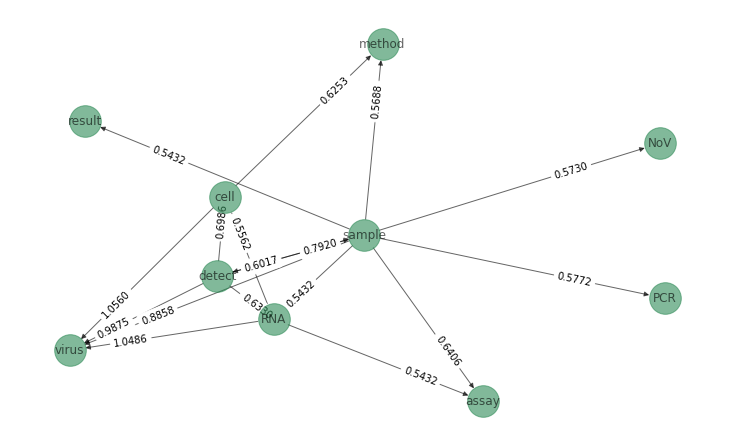

In [32]:
G = nx.DiGraph()
printDiGraph(Connect_NE,num = -1,word=word,threshold=threshold) 

In [33]:
all_appear = []

arr1 = Connect_NE.loc[word].values
arr1_appear = []
for i in arr1 :
    if str(i) != 'nan':
        print(i.split(',')[0])
        all_appear.append(i.split(',')[0])
        arr1_appear.append(i.split(',')[0])
if threshold ==2 :
    for each in arr1_appear :
        arr2 = Connect_NE.loc[each].values
        arr2_appear = []
        for i in arr2 :
            if str(i) != 'nan':
                if i.split(',')[0] not in all_appear :
                    print(i.split(',')[0])
                    all_appear.append(i.split(',')[0])
                    arr2_appear.append(i.split(',')[0])   

virus
sample
cell
RNA
assay
detect
PCR
NoV
method
result


In [34]:
def printDiGraph(Connect_NE,num = -1,word='',mode='one',times=1,threshold=2):
    
#     print(times,threshold)
    if times <= threshold:

        Index = Connect_NE.index.values
        if mode == 'one' :

            if num == -1 and word=='':
                now_Index = Index[0]
            elif num!=-1 and num>=0 :
                if(word!=''):
                    print('Mainly use number, delete number if you want to use text')
                now_Index = Index[num]

            elif word!='':
                try:
                    now_Index_num = list(Index).index(word)
                    now_Index = Index[now_Index_num]
                except:
                    print('This keyword does not exist in KG')
                    return 0
                
            elif num!=-1 and num>=0 and word!='':
                
                now_Index = Index[num]
            

            now_Index_NE = Connect_NE.loc[now_Index].values

            for each_NE in now_Index_NE :
                None_appear = False
                try:
                    NE = each_NE.split(',')[0]
                    NE_score = each_NE.split(',')[1][:6]
                    G.add_node(now_Index)
                    G.add_node(NE)
                    G.add_edge(now_Index,NE, label = NE_score , length = 1, color='red')

                    if times <= threshold:
                        printDiGraph(Connect_NE,word=NE,times=times+1,threshold=threshold)

                except:
                    None_appear = True
                    break
        elif mode == 'all' :
            for now_Index in Index[:5] :
                now_Index_NE = Connect_NE.loc[now_Index].values

                for each_NE in now_Index_NE :
                    None_appear = False
                    try:
                        NE = each_NE.split(',')[0]
                        NE_score = each_NE.split(',')[1][:6]
                        G.add_node(now_Index)
                        G.add_node(NE)
                        G.add_edge(now_Index,NE, label = NE_score , length = 1, color='red')
                    except:
                        None_appear = True
                        break            
        pos = nx.spring_layout(G, seed=1)
        label = nx.get_edge_attributes(G, 'label')

        if times == 1:
            fig = plt.figure(figsize=(10,6))
            nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
                    node_size=1000, node_color='seagreen', alpha=0.6,
                    labels={node: node for node in G.nodes()})

            nx.draw_networkx_edge_labels(G,pos,label_pos = 0.3,edge_labels=label)

            plt.axis('off')
            # plt.savefig('C:/Users/Tingchun.TC.Hung/Desktop/Record/知識圖譜/圖片/test.png')
#             plt.show()

            canvas = FigureCanvasTkAgg(fig, master=window)  # A tk.DrawingArea. root
            canvas.draw()
            #canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)

            toolbar = NavigationToolbar2Tk(canvas, window)
            toolbar.update()
            #canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)
            canvas.get_tk_widget().place(x=0, y=10)
            toolbar.place(x=240, y=520)
    

Mainly use number, delete number if you want to use text


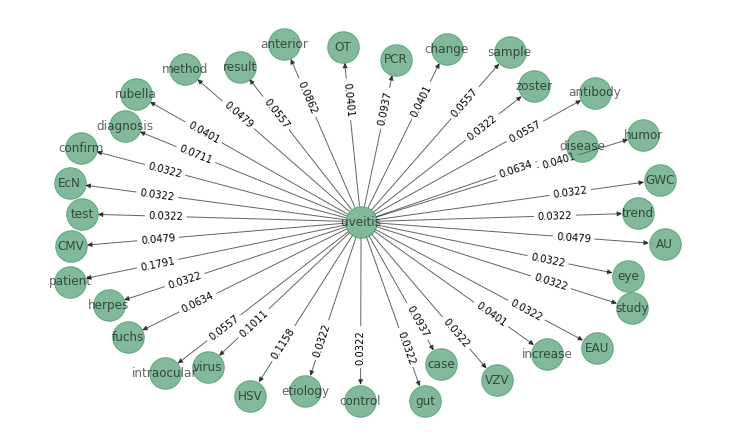

In [38]:


save_Dic_path = 'D:/Record/知識圖譜/產生字典/'

Connect_NE = pd.read_csv(save_Dic_path+'Connect_NE.csv')
Connect_NE.index = Connect_NE["Unnamed: 0"]
Connect_NE = Connect_NE.drop(columns=['Unnamed: 0'])


window = tk.Tk() 
window.title('Delta Knowledge Graph')

window.geometry('800x650')
window.resizable(False, False)
window.configure(bg='white')

G = nx.DiGraph()
printDiGraph(Connect_NE,num = 0,word='detect',threshold=1)

window.mainloop()